<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática Perceptron e Adaline - Filtragem de Dados

### Utilizando a Biblioteca Pandas e Seaborn



In [ ]:
import gdown
!gdown 19OhEU-5H-0bEPA-XE04uzmORLEeOoTOh

Downloading...
From: https://drive.google.com/uc?id=19OhEU-5H-0bEPA-XE04uzmORLEeOoTOh
To: /content/Titanic.csv
100% 61.2k/61.2k [00:00<00:00, 25.4MB/s]


In [ ]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Mapa de calor simples para ver onde estão os dados faltando.

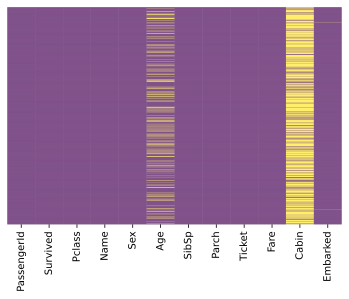

In [ ]:
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

#### Verificar idade média dos passageiros

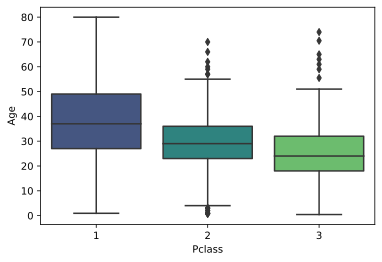

In [ ]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='viridis')

#### Podemos ver que os passageiros mais ricos nas classes mais altas tendem a ser mais velhos, o que faz sentido. Usaremos esses valores de idade média para imputar com base em Pclass for Age.

In [ ]:
len(df.loc[df['Pclass'] == 1])

216

In [ ]:
len(df.loc[df['Pclass'] == 2])

184

In [ ]:
len(df.loc[df['Pclass'] == 3])

491

In [ ]:
high_class = df.loc[df['Pclass'] == 1]

In [ ]:
high_class['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
pclass_age_map = {
  1: 38,
  2: 30,
  3: 25,
}
def replace_age_na(f_df, fill_map):
    cond=f_df['Age'].isna()
    res=f_df.loc[cond,'Pclass'].map(fill_map)
    f_df.loc[cond,'Age']=res
    return f_df

In [ ]:
res = ( 
    df
    .pipe(replace_age_na, pclass_age_map)
 )
res.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


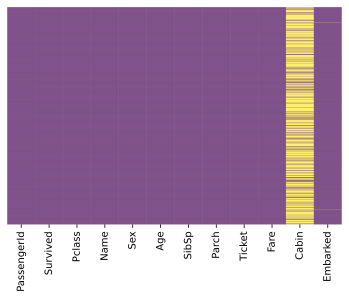

In [ ]:
sns.heatmap( res.isnull() , 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')